# ![alternative text](Coursera_png.png)
<font color='white'><p style="font-size: 40px;"><b>Data Analisys</b></p>

## <font color='white'>Why choosing Coursera as your education platform?<br> On this analisys, I'll try to find the reasons behind Coursera's success on the market of education, by answering some questions like the ones cited below:</font>

<font color='0080ff'>

- Is there a diverse amount of courses?
- Does the students enjoy the content?
- Does the platform has a good range of difficulty for all levels?
- Does the platform contains relevant partners?

</font>


## <font color='white'>This is the Data provided by Coursera, where my analisys will be based on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def convert_course_students_enrolled_to_integer_numbers(coursera_data):
    total_enrolled_students = coursera_data['Course_students_enrolled']
    list_float = []
    for number in total_enrolled_students:
        if 'm' in number:
            number = float(number.replace('m', '')) * 1000000
            list_float.append(number)
        elif 'k' in number:
            number = float(number.replace('k', '')) * 1000
            list_float.append(number)

    coursera_data['Course_students_enrolled'] = list_float

In [3]:
coursera_data = pd.read_csv('coursera_data.csv')
del coursera_data['Unnamed: 0']
coursera_data.drop_duplicates()
coursera_data = coursera_data.rename(str.capitalize, axis='columns')
convert_course_students_enrolled_to_integer_numbers(coursera_data)
coursera_data.head(10)

,Course_title,Course_organization,Course_certificate_type,Course_rating,Course_difficulty,Course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000.0
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400.0
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000.0
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12000.0


## <font color='white'>Broad Analisys

### <font color='0080ff'>Total Courses</font>

In [4]:
total_courses = coursera_data['Course_title'].size
print(f'Coursera has a total of {total_courses} courses')

Coursera has a total of 891 courses


#### <font color='0080ff'>Answer
- Based on the data, Coursera has a total of 891 courses available in the platform.

</font>

### <font color='0080ff'>Total Organizations</font>

In [5]:
total_organizations = pd.DataFrame(coursera_data.groupby(
    by='Course_organization').count())['Course_title']

print(f'Coursera has a total of {total_organizations.size} organizations')

Coursera has a total of 154 organizations


#### <font color='0080ff'>Answer
- Coursera has a total of 154 partners in the platform.

</font>

### <font color='0080ff'>Total Enrolled Students</font>

In [6]:
total_enrolled_students = coursera_data['Course_students_enrolled'].sum()
print(
    f'Coursera has a total of {total_enrolled_students} students enrolled in the courses')

Coursera has a total of 80681900.0 students enrolled in the courses


#### <font color='0080ff'>Answer
- If we sum all the enrolled students in the platform, it's possible to find the total of 80,681,900.00 students.

</font>

### <font color='0080ff'>Range of Difficulty</font>

In [7]:
range_of_difficulty = pd.DataFrame(coursera_data.groupby(
    by='Course_difficulty')['Course_title'])[0]

pd.DataFrame(range_of_difficulty)

,0
0,Advanced
1,Beginner
2,Intermediate
3,Mixed


#### <font color='0080ff'>Answer
- Coursera offers 4 different ranges of difficulty: Beginner, Intermediate, Advanced and Mixed. 

</font>

### <font color='0080ff'>Types fo Certification</font>

In [8]:
course_certificate_type = pd.DataFrame(coursera_data.groupby(
    by='Course_certificate_type')['Course_title'])[0]

pd.DataFrame(course_certificate_type)

,0
0,COURSE
1,PROFESSIONAL CERTIFICATE
2,SPECIALIZATION


#### <font color='0080ff'>Answer
- Coursera offers 3 different types of certification: Course, Professional Certificate and Specialization. 

</font>

## <font color='white'>Courses Analisys

### <font color='0080ff'>Which courses has most enrolled students?</font>

In [23]:
most_enrolled_courses = coursera_data.sort_values(
    'Course_students_enrolled', ascending=False).head(15)

most_enrolled_courses

,Course_title,Course_organization,Course_certificate_type,Course_rating,Course_difficulty,Course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
261,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0


#### <font color='0080ff'>Answer
- On this table, we can see the TOP 10 Courses that has the highest amount of students enrolled.

</font>

### <font color='0080ff'>From most enrolled course, which ones has the highest course rating?</font>

In [27]:
most_enrolled_courses_by_rating = most_enrolled_courses.sort_values(
    'Course_rating', ascending=False).head(10)

most_enrolled_courses_by_rating[['Course_title', 'Course_rating']]

,Course_title,Course_rating
564,Machine Learning,4.9
815,The Science of Well-Being,4.9
626,Neural Networks and Deep Learning,4.9
688,Python for Everybody,4.8
674,Programming for Everybody (Getting Started wit...,4.8
261,English for Career Development,4.8
765,Successful Negotiation: Essential Strategies a...,4.8
211,Deep Learning,4.8
426,Improve Your English Communication Skills,4.7
18,Academic English: Writing,4.7


#### <font color='0080ff'>Answer
- The courses that has the highest rating are "Machine Learning" & "The Science of Well-Being" with a 4.9.

</font>

### <font color='0080ff'>Comparison between Courses Difficulty?</font>

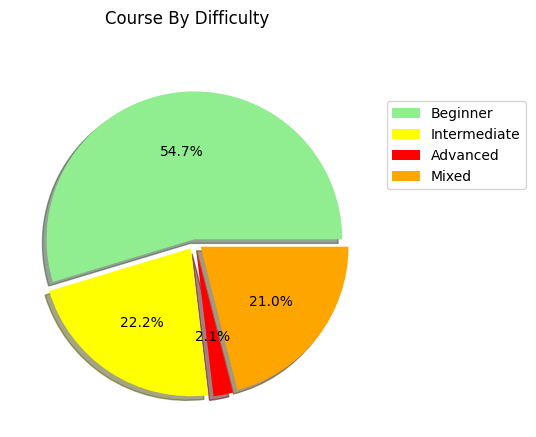

In [11]:
# Graph of percentage of rating
beginner_courses = len(
    coursera_data.loc[coursera_data['Course_difficulty'] == 'Beginner'])
intermediate_courses = len(
    coursera_data.loc[coursera_data['Course_difficulty'] == 'Intermediate'])
advanced_courses = len(
    coursera_data.loc[coursera_data['Course_difficulty'] == 'Advanced'])
mixed_courses = len(
    coursera_data.loc[coursera_data['Course_difficulty'] == 'Mixed'])

colors = ['lightgreen', 'yellow', 'red', 'orange']
data = pd.DataFrame({'%': [beginner_courses, intermediate_courses, advanced_courses, mixed_courses]}, index=[
                    'Beginner', 'Intermediate', 'Advanced', 'Mixed'])
ax = data.plot(kind="pie", subplots=True, autopct='%1.1f%%', shadow=True, colors=colors, explode=[
               0.02, 0.05, 0.05, 0.05],  title='Course By Difficulty', ylabel='', labeldistance=None)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

#### <font color='0080ff'>Answer
- More than 50% of the courses in the platform are for "Beginners".However, there is a good balance between "Intermediate" and "Mixed". But sadly, 2% of Coursera's courses are for advanced students who are looking for higher standard content.

</font>

### <font color='0080ff'>Is there courses below 4 ?</font>

In [28]:
courses_below_4 = coursera_data.loc[coursera_data['Course_rating'] < 4]
courses_below_4.sort_values('Course_rating')

,Course_title,Course_organization,Course_certificate_type,Course_rating,Course_difficulty,Course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000.0
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000.0


#### <font color='0080ff'>Answer
- This is a table that show the lowest rating courses in the platform. With a "Course_rating" lower than 4.0

</font>

### <font color='0080ff'>Comparison between Course_rating above and below 4.5</font>

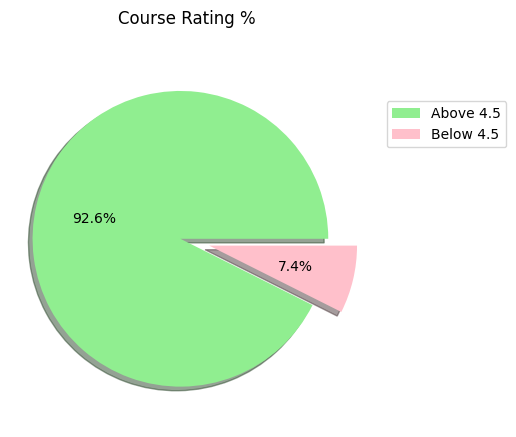

In [13]:
# Graph of percentage of rating
courses_below_4 = len(coursera_data.loc[coursera_data['Course_rating'] < 4.5])
courses_above_4 = len(coursera_data.loc[coursera_data['Course_rating'] >= 4.5])

colors = ['lightgreen', 'pink']
data = pd.DataFrame({'%': [courses_above_4, courses_below_4]}, index=[
                    'Above 4.5', 'Below 4.5'])
ax = data.plot(kind="pie", subplots=True, autopct='%1.1f%%', colors=colors, shadow=True, explode=[
               0.1, 0.1],  title='Course Rating %', ylabel='', labeldistance=None)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

#### <font color='0080ff'>Answer
- We can see from this "Pie Chart" that Coursera has a great rating. More than 92% of the courses has a rating of 4.5 or higher

</font>

### <font color='0080ff'>Total of Courses by type of Cerfitication</font>

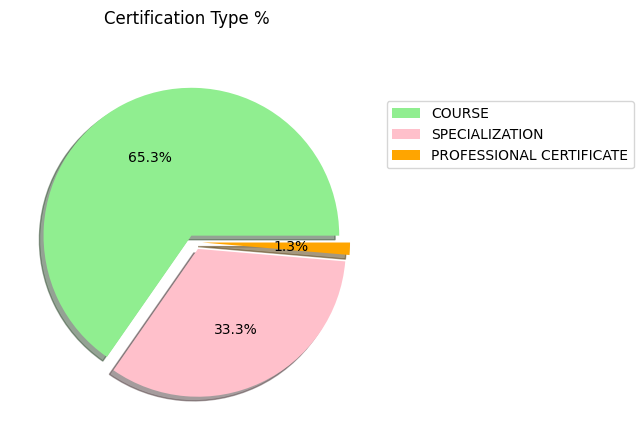

In [14]:
course_certificate_type = pd.DataFrame(coursera_data.groupby(by='Course_certificate_type').count()
                                       .rename(columns={'Course_title': 'Total'})['Total'])
data = course_certificate_type.sort_values('Total', ascending=False)

colors = ['lightgreen', 'pink', 'orange']
ax = data.plot(kind="pie", subplots=True, autopct='%1.1f%%', colors=colors, shadow=True, explode=[
               0.05, 0.05, 0.05],  title='Certification Type %', ylabel='', labeldistance=None)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

#### <font color='0080ff'>Answer
- Coursera courses shows only 3 types of specialization. However, the vast majority of the courses are just "Course Certification" with 65.3% in total.

</font>

## <font color='white'>Organization Analisys

### <font color='0080ff'>Top 10 Organizations with most courses</font>

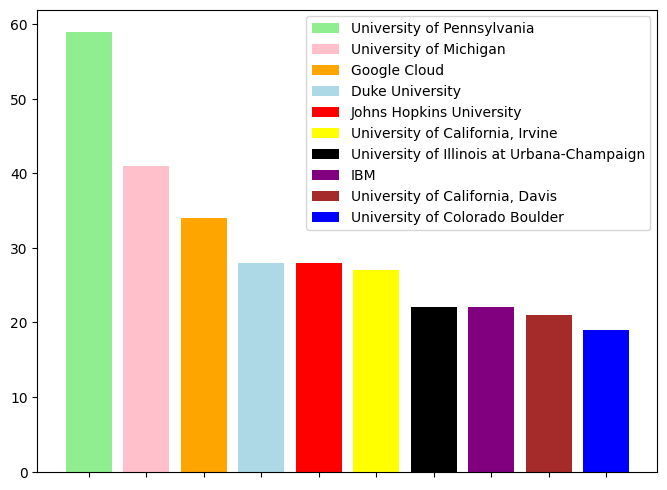

In [15]:
top_organizations = pd.DataFrame(coursera_data.groupby(by='Course_organization').count()
                                 .rename(columns={'Course_title': 'Total'})
                                 .sort_values(by='Total', ascending=False)['Total']
                                 .head(10))
colors = ['lightgreen', 'pink', 'orange', 'lightblue',
          'red', 'yellow', 'black', 'purple', 'brown', 'blue']
fig, ax = plt.subplots()
ax.set_xticklabels('')
fig.set_size_inches(8, 6)
ax.bar(top_organizations.index, top_organizations.iloc[:, 0], color=colors)
ax.legend(ax.patches, top_organizations.index)

#### <font color='0080ff'>Answer
- This chart shows an amazing information about the organizations with most courses in the platform. Even though there are a lot of organizations, the "Top 10" shows an expressively known universities and organizations such as "University of Pennsylvania", "University of Michigan" and "University of California". Based on that, we can conclude that Coursera has great partners as educators in the platform.

</font>

### <font color='0080ff'>Top 10 organizations based on Enrolled Students</font>

Text(0, 0.5, 'In Millions')

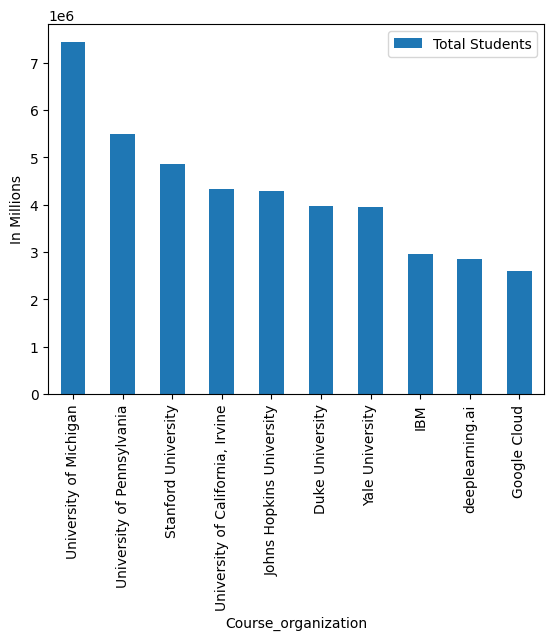

In [16]:
total_students_by_organization = pd.DataFrame(coursera_data.groupby('Course_organization')
                                              .agg({'Course_students_enrolled': 'sum'})
                                              .rename(columns={'Course_students_enrolled': 'Total Students'}))

data = total_students_by_organization.round().sort_values(
    'Total Students', ascending=False).head(10)
ax = data.plot.bar()
ax.set_ylabel('In Millions')

#### <font color='0080ff'>Answer
- This is a table that show the TOP 10 highest based on "Course_students_enrolled". Where "University of Michigan" leads with more than 7 million students

</font>

### <font color='0080ff'>Highest Average Organization "Course_rating" value</font>

(4.8, 4.95)

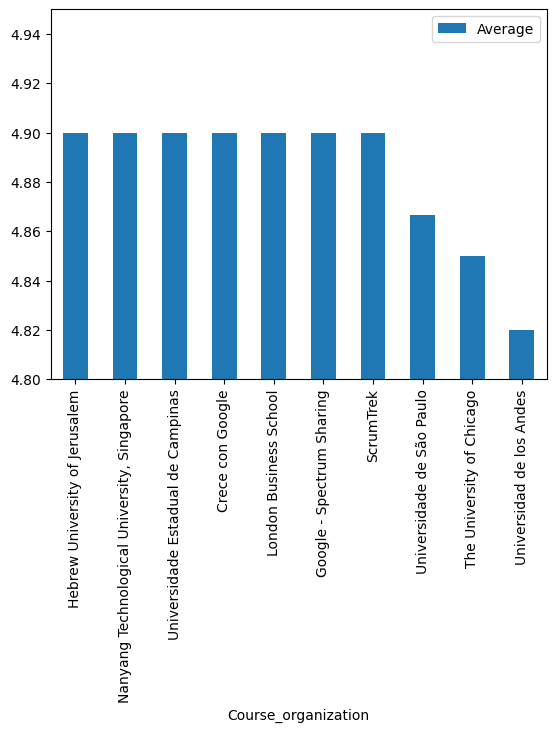

In [17]:
avg_course_rating_by_organization = pd.DataFrame(coursera_data.groupby('Course_organization')
                                                 .agg({'Course_rating': 'sum', 'Course_rating': 'mean'})
                                                 .rename(columns={'Course_rating': 'Average'}))

data = avg_course_rating_by_organization.sort_values(
    'Average', ascending=False).head(10)
ax = data.plot.bar()
ax.set_ylim(4.8, 4.95)

#### <font color='0080ff'>Answer
- There are more than 5 Organization with the same highest "Course Rating" in the platform. That represents a great diversification of organizations, when the parameter is based on "Course Rating".

</font>

### <font color='0080ff'>Highest Average Organization "Course_rating" value with more than 1 course</font>

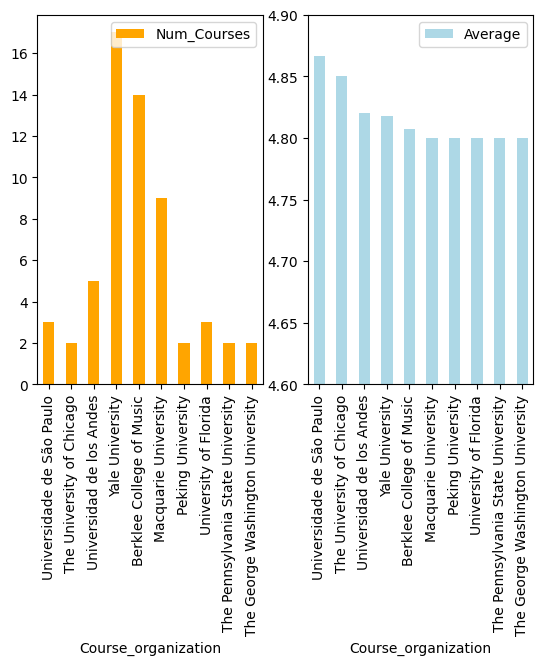

In [18]:
avg_course_rating_by_organization = pd.DataFrame(coursera_data.groupby('Course_organization')
                                                 .agg({'Course_title': 'size', 'Course_rating': 'sum', 'Course_rating': 'mean'})
                                                 .rename(columns={'Course_title': 'Num_Courses', 'Course_rating': 'Average'}))

data = avg_course_rating_by_organization.loc[avg_course_rating_by_organization['Num_Courses'] > 1].sort_values(
    'Average', ascending=False).head(10)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = data[["Num_Courses"]].plot(ax=axes[0], kind='bar', color='orange')
ax2 = data[["Average"]].plot(
    ax=axes[1], kind='bar', color='lightblue', ylim=(4.6, 4.9))

#### <font color='0080ff'>Answer
- On the first chart, it's possible to see the amount of courses each course has based on the highest "Course Rating" in the platform.
- On the second chart, it shows the "Course Rating" of each organization.
- It´s possible to see that highest amount of courses doesn't represent the lowest "Course Rating". Either the opposite, the lowest amount of courses isn't the highest "Course Rating".

</font>

## <font color='white'>Certification Analisys

### <font color='0080ff'>Cerfication by Student Enrolled</font>

Text(0, 0.5, 'In Millions')

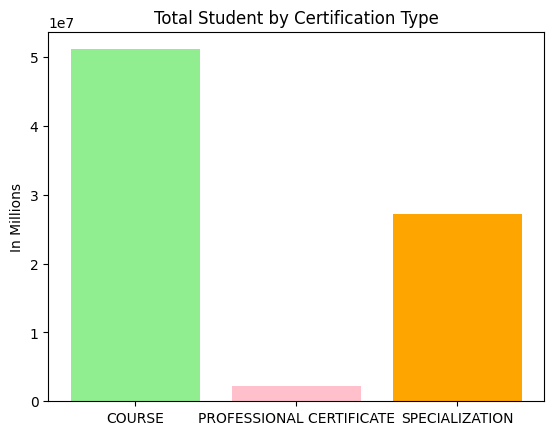

In [19]:
specialization_certificate = pd.DataFrame(coursera_data.groupby('Course_certificate_type')
                                          .agg({'Course_students_enrolled': 'sum'})
                                          .rename(columns={'Course_students_enrolled': 'Total Students'}))

colors = ['lightgreen', 'pink', 'orange']
fig, ax = plt.subplots()
ax.bar(specialization_certificate.index,
       specialization_certificate.iloc[:, 0], color=colors)
ax.set_title('Total Student by Certification Type')
ax.set_ylabel('In Millions')

#### <font color='0080ff'>Answer
- It's possible to see on this chart that most of the students in Coursera are enrolled in courses with a "Course Certification" with more than 5 million students. And, thera are still students looking for "Specialization Certification". However, "Professional Certification" has not a lot of students.

</font>

### <font color='0080ff'>Cerfication by Level of Difficulty</font>

<Figure size 800x600 with 0 Axes>

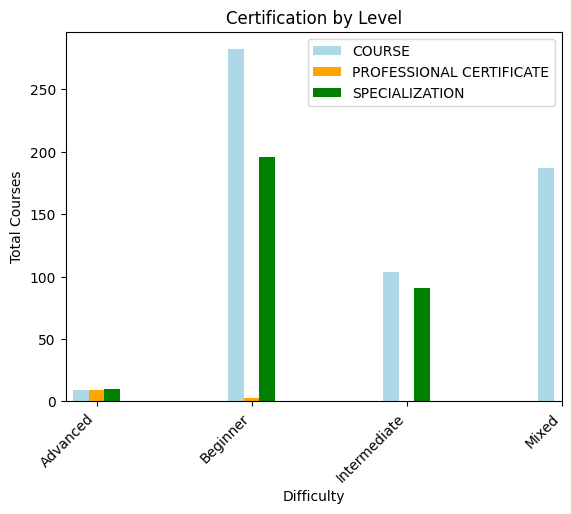

In [20]:
difficulty = ['COURSE', 'PROFESSIONAL CERTIFICATE', 'SPECIALIZATION']
data = []
for d in difficulty:
    data.append(pd.DataFrame(coursera_data.loc[coursera_data['Course_certificate_type'] == d]
                             .groupby('Course_difficulty').count()['Course_title'])
                .rename(columns={'Course_title': d}))

df = data[0]
df1 = data[1]
df2 = data[2]

plt.figure(figsize=(8, 6))
bar_width = 0.1
bar_positions = np.arange(len(df))

df.plot(kind='bar', position=1.5, width=bar_width,
        label='DataFrame 0', color='lightblue')
df1.plot(kind='bar', position=0.5, width=bar_width,
         ax=plt.gca(), label='DataFrame 1', color='orange')
df2.plot(kind='bar', position=-0.5, width=bar_width,
         ax=plt.gca(), label='DataFrame 2', color='green')

plt.xticks(bar_positions, df.index, rotation=45, ha='right')
plt.ylabel('Total Courses')
plt.xlabel('Difficulty')
plt.title('Certification by Level')
plt.legend()

#### <font color='0080ff'>Answer
- This Chart shows the amount courses of each "Certification Type" has by "Level of Difficulty".
- By far, "COURSE" has a more diverse amount of difficulty levels. And "Beginner" being the highest with more than 250 courses.
- Not every certification contains all levels of difficulty. "PROFESSIONAL CERTIFICATE" doesn't have "Intermediate" and "Mixed", and "SPECIALIZATION" doesn't have "Mixed".

</font>

## <font color='white'>Difficulty x Students Analisys

Text(0, 0.5, 'In Millions')

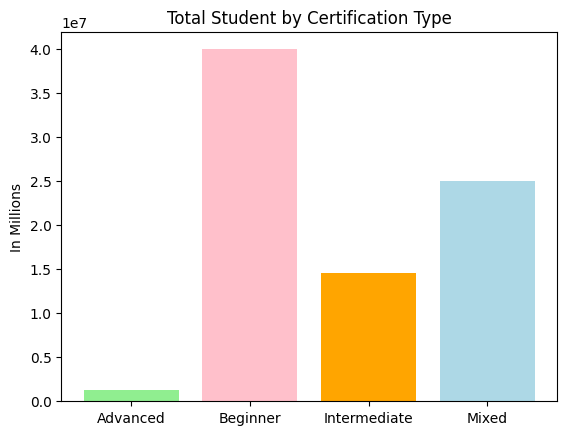

In [21]:
specialization_certificate = pd.DataFrame(coursera_data.groupby('Course_difficulty')
                                          .agg({'Course_students_enrolled': 'sum'})
                                          .rename(columns={'Course_students_enrolled': 'Total Students'}))

colors = ['lightgreen', 'pink', 'orange', 'lightblue']
fig, ax = plt.subplots()
ax.bar(specialization_certificate.index,
       specialization_certificate.iloc[:, 0], color=colors)
ax.set_title('Total Student by Certification Type')
ax.set_ylabel('In Millions')

#### <font color='0080ff'>Answer
- It's easy to see that most students are looking for "Beginner" courses, with almost 4 million students enrolled on it.
- But suprinsigly, "Mixed" is ahead of the other three difficulties with approximately 2.5 million students.

</font>

## <font color='white'>Course Rating x Students Analisys

### <font color='0080ff'>Correlation</font>

<Axes: >

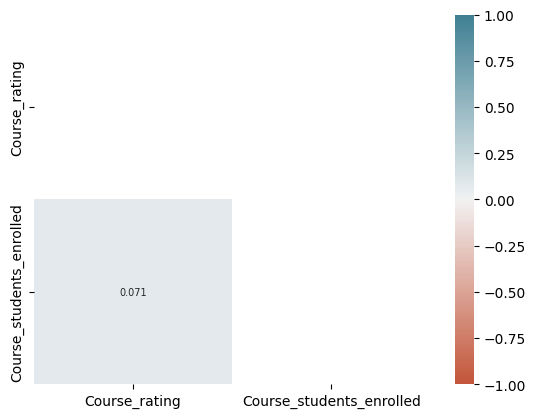

In [22]:
col = ['Course_rating', 'Course_students_enrolled']
corr_mat = coursera_data[col].corr()

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize': 7},
            mask=mask,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

#### <font color='0080ff'>Answer
- The correlation between "Course Rating" and "Students Enrolled" is really small with only 0.071. Which it means that students don't enroll to just courses of high rating.

</font>

## <font color='white'>Conclusion

### <font color='0080ff'>Broad Analysis</font>

#### <font color='0080ff'>Answer
- In terms of diversity, Coursera contains more than 800 courses, 150 organizations, 8 million students, 3 levels of difficulty and 3 different course specialization. Based on that information, it's possible to see that new students has a vast amount of options to pursue in the platform for their next career.

</font>

### <font color='0080ff'>Course Analysis</font>

#### <font color='0080ff'>Answer
- By evaluating the courses, we can first assume that some courses would held most of the students in it. However, there are almost 15 courses with more than 500 thousand students learning for them.
- When we analyse the rating, to not say all aof the courses, almost all courses have pretty good rating above 4.0. Just leaving less than 5 courses under that score.
- From all the courses, we can see that more than 50% are for beginners. But the other 50% are almost held by other 2 difficulties, leaving "Mixed" difficulty with just 2%.
- And from the specialization aspect of the courses, the majority is just "Course Certification". Even though, "Specialization Certification" has around 30% of the total.

</font>

### <font color='0080ff'>Organization Analysis</font>

#### <font color='0080ff'>Answer
- Coursera's data shows that has relevant partners in the platform, which it helps students to validate with ease the quality of the content. And from those organizations, they have the majority of the students enrolled on it.
- Most of the organizations are evaluated with high rating scores. 

</font>

### <font color='0080ff'>Certification Analysis</font>

#### <font color='0080ff'>Answer
- In terms of diversity, Coursera contains more than 800 courses, 150 organizations, 8 million students, 3 levels of difficulty and 3 different course specialization. Based on that information, it's possible to see that new students has a vast amount of options to pursue in the platform for their next career.

</font>

### <font color='0080ff'>Final Analysis</font>

#### <font color='0080ff'>Answer
- On this analysis, it's possible to see all the elements that compose a sucessful platform when seeing all those aspect cited in the beginning of the "Coursera Analysis".
- Coursera contains a vast amount of courses in the platform, with relevant organizations composing the strcuture of partnership.
- The platform has a great quality avaliated by the students in the majority of the courses offered.
- Coursera also relies on a good balanced of levels for what new clients might be looking for, and a sufficient options for certification.
- In conclusion to that, we can defitenely say that Coursera is a successful platform in the online education market.

</font>